In [103]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image
import torch

In [70]:
dataloc = "C:/Users/Advait Patel/Hackathons/hackIMSA/data/chest_xray/"
test_dir = os.path.join(dataloc,'test') 
train_dir = os.path.join(dataloc,'train') 
val_dir =os.path.join(dataloc,'val') 

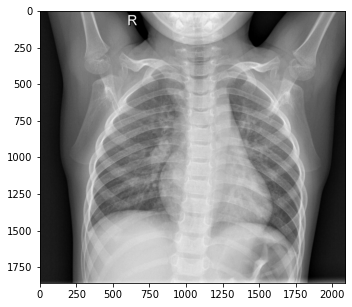

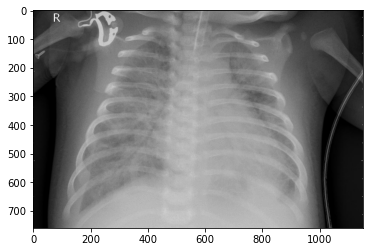

In [71]:
plt.figure(figsize=(15, 5))

categ = ["NORMAL", "PNEUMONIA"]

for ca in categ:
    path = os.path.join(train_dir,ca)
    for img in os.listdir(path):
        img_arr =Image.open(os.path.join(path,img)) 
        arr = np.array(img_arr)
        plt.imshow(np.array(img_arr),cmap='gray')
        plt.show()
        break


In [72]:
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

PNEUMONIA=3875
NORMAL=1341


In [73]:
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

PNEUMONIA=8
NORMAL=8


In [74]:
new_arr = img_arr.resize((150,150))

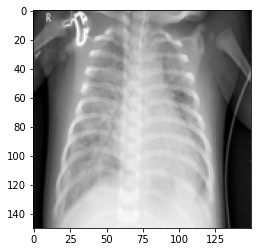

In [75]:
plt.imshow(new_arr, cmap='gray')
plt.show()

In [76]:
def get_data(output_list, categ, data_dir):
    img_size = 150
    for ca in categ:
        path = os.path.join(data_dir, ca)
        class_num = categ.index(ca)
        for img in os.listdir(path):
            try:
                img_arr = Image.open(os.path.join(path, img)) 
                new_img = img_arr.resize((img_size, img_size))
                new_img = np.asarray(new_img)
                arr = new_img.reshape((img_size, img_size, 1))
                output_list.append([arr, class_num])
            except Exception as e:
                e = e
    

In [77]:
train_list = []
val_list = []
test_list = []

get_data(train_list, categ, train_dir)
get_data(val_list, categ, val_dir)
get_data(test_list, categ, test_dir)

In [78]:
print("train: ", len(train_list))
print("val: ", len(val_list))
print("test: ", len(test_list))

train:  4933
val:  16
test:  624


In [79]:
for i in range(608):
    ele = train_list.pop(0)
    val_list.append(ele)

In [80]:
print("train: ", len(train_list))
print("val: ", len(val_list))
print("test: ", len(test_list))

train:  4325
val:  624
test:  624


In [81]:
def split_data(X, y, split_list):
    img_size = 150
    for img, label in split_list:
        X.append(img)
        y.append(label)
    X = np.array(X).reshape(-1, img_size, img_size, 1)

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

split_data(X_train, y_train, train_list)
split_data(X_val, y_val, val_list)
split_data(X_test, y_test, test_list)

In [82]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [83]:
X_train = X_train/255.0
X_test = X_test/255.0
X_val = X_val/255.0

In [87]:
X_train

array([[[[0.        ],
         [0.        ],
         [0.03529412],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.03137255],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.01960784],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.47058824],
         [0.53333333],
         [0.65

In [88]:
y_train.shape

(4325,)

In [89]:
X_train[0].shape

(150, 150, 1)

In [98]:
X_train = X_train.reshape(1,150,150,4325)

In [100]:
X_train[0].shape

(150, 150, 4325)

In [107]:
tensor_train = torch.Tensor(X_train)

In [108]:
tensor_train.shape

torch.Size([1, 150, 150, 4325])

In [109]:
tensor_train[0].size(0)

150

In [110]:
X_train = X_train.reshape(4325, 150,150, 1)

In [111]:
tensor_train.shape

torch.Size([1, 150, 150, 4325])

In [112]:
tensor_train = tensor_train.reshape(4325,150,150,1)

In [113]:
tensor_train.shape

torch.Size([4325, 150, 150, 1])

In [114]:
tensor_train[0].size(0)

150

In [115]:
y_train.shape

(4325,)

In [117]:
tensor_train = tensor_train.reshape(1,4325,150,150)

In [118]:
tensor_train.shape

torch.Size([1, 4325, 150, 150])

In [119]:
tensor_train[0].size(0)

4325

In [120]:
tensor_train_y = torch.Tensor(y_train)
tensor_train_y.shape

torch.Size([4325])

In [122]:
tensor_train_y.size(0)

4325